In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# Car dim
L = 2.

In [125]:
# get steering angle from E2E learning
steering_angle_arr = [15. * np.pi / 180.0 for i in range(25)]

In [126]:
# for each pair of steering angle calculate phi
phi_arr = [1. * np.tan(delta) / L for delta in steering_angle_arr] 

In [127]:
def gRot_m(theta):
    '''
    Calculate orientation of robot frame wrt global frame
    
    :param theta: 
        (rad) orientation of robot frame
    '''
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta), 0],
                     [0, 0, 1]])


def toGlobalFrame(t, theta, m_xy):
    '''
    transform position in robot frame to global frame
    
    :param t:
        position of robot in global frame
        
    :param theta:
        orientation of robot frame
    
    :param m_xy:
        position in robot frame
    '''
    m_xy = m_xy.reshape((-1, 1))
    g_xy = gRot_m(theta).dot(m_xy) + t.reshape((-1, 1))
    return g_xy.squeeze()
    

In [133]:
way_pts_x = []  # coord in global frame
way_pts_y = []

theta_t = 0  # initial orientation
t = np.zeros(3)  # initial position
t[-1] = 1

icr_x = []
icr_y = []

for delta, phi in zip(steering_angle_arr, phi_arr):
    if delta < 1e-4:
        pass
    R = L / np.tan(delta)  # radius of the circle on which robot moves 
    for gamma in np.linspace(0, phi):
        # way_pts
        m_xy = np.array([R * np.sin(gamma), R * (1 - np.cos(gamma)), 1])  # local coord
        g_xy = toGlobalFrame(t, theta_t, m_xy)
        way_pts_x.append(g_xy[0])
        way_pts_y.append(g_xy[1])
        
        # ICR
        g_icr_xy = toGlobalFrame(t, theta_t, np.array([0, R, 1]))
        icr_x.append(g_icr_xy[0])
        icr_y.append(g_icr_xy[1])
    
    # Update pose 
    theta_t += phi
    t = np.array([way_pts_x[-1], way_pts_y[-1], 1])

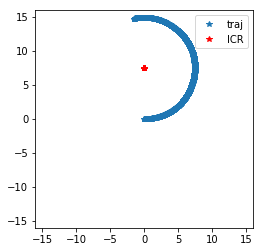

In [136]:
plt.plot(way_pts_x, way_pts_y, '*', label='traj')
plt.plot(icr_x, icr_y, 'r*', label='ICR')
plt.legend()
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()